# Plot results for ADMM's algorithm

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [2]:
# Importing the datasets
X_train = pd.read_csv("dataset/X_train.csv")
t_train = pd.read_csv("dataset/t_train.csv")
X_test = pd.read_csv("dataset/X_test.csv")
t_test = pd.read_csv("dataset/t_test.csv")

In [3]:
# Importing the results from the json file
results = pd.read_json("results/ADMM.json")

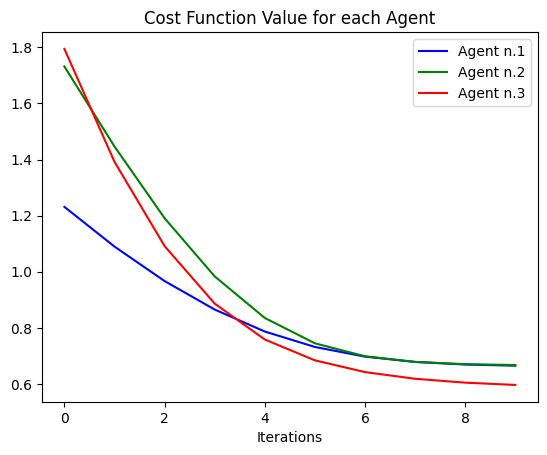

In [4]:
# Plotting the cost function for each agent
x = np.array(range(0, 10))
cost_function_values = results["cost_function_values"].to_numpy()

cost_function_values = cost_function_values.tolist()[0]

# Initializing a matrix with the cost function values for each agent
cost_function_values_by_agent = np.zeros([3, 700])

for i in range(0, len(cost_function_values)):
    cost_function_values_by_agent[:, i] = cost_function_values[i]

plt.plot(x, cost_function_values_by_agent[0, :10], label="Agent n.1", color="blue")
plt.plot(x, cost_function_values_by_agent[1, :10], label="Agent n.2", color="green")
plt.plot(x, cost_function_values_by_agent[2, :10], label="Agent n.3", color="red")

plt.title("Cost Function Value for each Agent")
plt.xlabel("Iterations")
plt.legend()
plt.show()

In [5]:
results["optimal_parameters_values"].tolist()[0][2]
parameters_for_agent = np.zeros([10,4])

for i in range(0, 3):
    parameters_for_agent[:, i] = results["optimal_parameters_values"].tolist()[0][i]

parameters_for_agent[:,3] = results["z"].to_list()[0]

df = pd.DataFrame(parameters_for_agent).head(10)
df.columns = ["Agent 1", "Agent 2", "Agent 3", "z"]

In [6]:
# Plotting the optimal parameters for each agent and the z values
print(df)

    Agent 1   Agent 2   Agent 3         z
0 -0.481807 -0.434910  0.981161  0.021481
1  0.046405 -0.002012  0.099646  0.048013
2 -0.006264  0.032219 -0.040828 -0.004958
3  0.030963  0.088087  0.024644  0.047898
4  0.004818  0.135682 -0.032156  0.036115
5 -0.027558  0.006207 -0.039457 -0.020269
6  0.013379  0.039174 -0.029244  0.007770
7  0.059513 -0.076544 -0.109856 -0.042295
8  0.120183 -0.077903 -0.000742  0.013846
9  0.068753 -0.007785 -0.101807 -0.013613


In [7]:
# Adding the bias term to the training and test sets
X_train = np.hstack([np.ones([X_train.shape[0], 1]), X_train])
X_test = np.hstack([np.ones([X_test.shape[0], 1]), X_test])

In [8]:
# Defining the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [9]:
# Extracting z from the results and converting it to a numpy array
parametri_ottimi = results["z"]
parametri_ottimi = np.array(parametri_ottimi[0])

# Calculating the predictions for the training and test sets
y_pred_train = sigmoid(np.dot(X_train, parametri_ottimi)) > 0.5
y_pred_test = sigmoid(np.dot(X_test, parametri_ottimi)) > 0.5


Accuracy on the training set: 0.4899874843554443
F1 score on the training set: 0.5302593659942363

Classification report for the training set:
              precision    recall  f1-score   support

           0       0.49      0.40      0.44      1598
           1       0.49      0.58      0.53      1598

    accuracy                           0.49      3196
   macro avg       0.49      0.49      0.49      3196
weighted avg       0.49      0.49      0.49      3196


Accuracy on the test set: 0.4817073170731707
F1 score on the test set: 0.4894894894894896

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.62      0.38      0.47       400
           1       0.40      0.64      0.49       256

    accuracy                           0.48       656
   macro avg       0.51      0.51      0.48       656
weighted avg       0.53      0.48      0.48       656



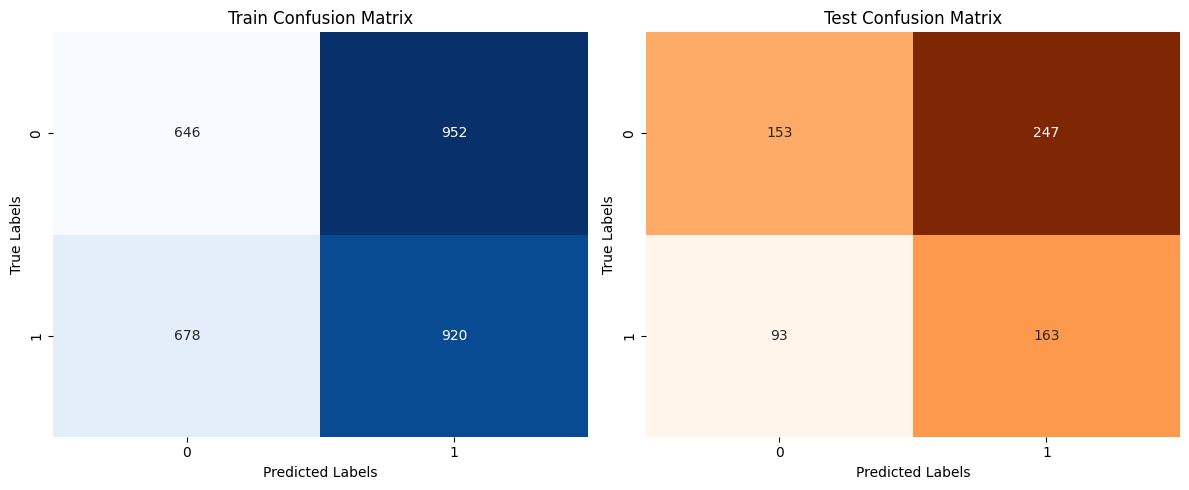

In [10]:
# Accuracy and F1 score for the training set
print(f"Accuracy on the training set: {accuracy_score(t_train, y_pred_train)}")
print(f"F1 score on the training set: {f1_score(t_train, y_pred_train)}\n")

# Classification report for the training set
print("Classification report for the training set:")
print(classification_report(t_train, y_pred_train))
print()

# Accuracy and F1 score for the test set
print(f"Accuracy on the test set: {accuracy_score(t_test, y_pred_test)}")
print(f"F1 score on the test set: {f1_score(t_test, y_pred_test)}\n")

# Classification report for the test set
print("Classification report for the test set:")
print(classification_report(t_test, y_pred_test))

# Confusion matrix for the training set
cm_train = confusion_matrix(t_train, y_pred_train)

# Confusion matrix for the test set
cm_test = confusion_matrix(t_test, y_pred_test)

# Plotting the confusion matrices
plt.figure(figsize=(12, 5))

# Subplot for the training confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Subplot for the test confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.tight_layout()
plt.show()

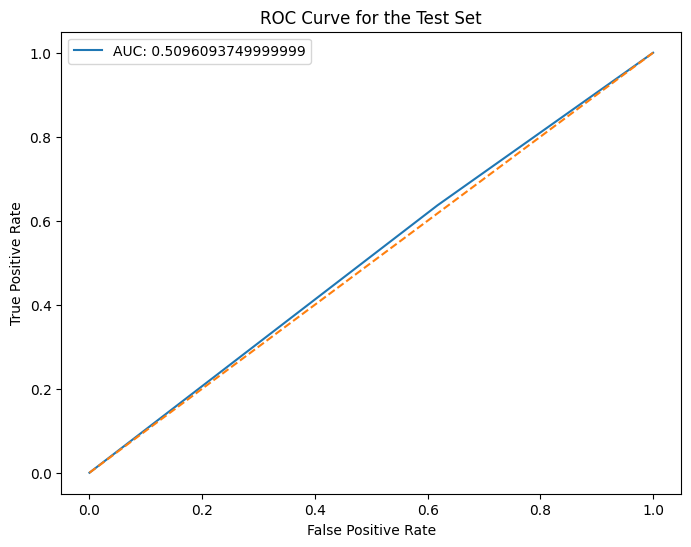

In [11]:
# Calculating the ROC curve for the test set
fpr, tpr, thresholds = roc_curve(t_test, y_pred_test)

# Calculating the AUC for the test set
auc_score = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC: {auc_score}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("ROC Curve for the Test Set")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()